# Clustering Project
In this project, we have a number of data from customers along with their income and Scores, and we want to divide these people into clusters using clustering algorithms.

### Clustering With K-Means

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder, StandardScaler

### read and show information of data set

In [2]:
# read dataset

df_customer = pd.read_csv('customer.csv')
df_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# shape and name of the columns

print(df_customer.shape)
print(df_customer.columns)

(200, 5)
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [4]:
# Display the information and then we realize that the column is related to the Gender of the object and should be changed in the preprocessing

df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# describe

df_customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### preprocessing

In [6]:
# checking for null value

df_customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# change gender value to int

change_gender = LabelEncoder()
df_customer['Gender'] = change_gender.fit_transform(df_customer['Gender'])
df_customer['Gender'] = df_customer['Gender'].astype(int)
print(df_customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB
None


In [8]:
# To continue this project, we do not need the customer ID and we select the rest of the columns as required features.

X = df_customer.values[:,1:]
X[:5]

array([[ 1, 19, 15, 39],
       [ 1, 21, 15, 81],
       [ 0, 20, 16,  6],
       [ 0, 23, 16, 77],
       [ 0, 31, 17, 40]])

In [9]:
# dataset normalization

standard_df_customer = StandardScaler()
standard_df_customer.fit_transform(X)
standard_df_customer


StandardScaler()

# K-Means

In [10]:
cluster_num = 4
k_means = KMeans(init='k-means++', n_clusters=cluster_num, n_init=12)
k_means.fit(X)
labels = k_means.labels_
labels

array([3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [14]:
# add the labels to the main dataset

df_customer['clust_km'] = labels
df_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust_km
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,1
3,4,0,23,16,77,3
4,5,0,31,17,40,1


In [15]:
# groupby with clust_km and calculate mean value

df_customer.groupby('clust_km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
clust_km,,,,,
0,162.000000,0.461538,32.692308,86.538462,82.128205
1,71.625000,0.385417,44.770833,48.635417,42.812500
2,162.000000,0.526316,40.394737,87.000000,18.631579
3,27.777778,0.481481,24.518519,28.222222,74.777778


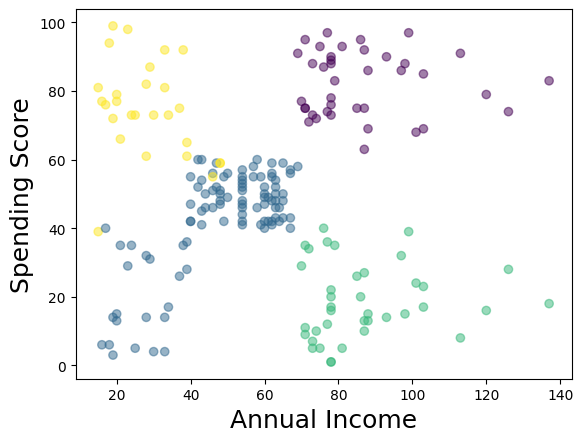

In [16]:
# plot with income and score

plt.scatter(X[:,2], X[:,3], c=labels.astype(np.float64), alpha=0.5)
plt.xlabel("Annual Income" , fontsize=18)
plt.ylabel("Spending Score" , fontsize=18)
plt.show()

### Hierarchical

In [25]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
 5   clust_km                200 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 8.7 KB


In [26]:
df_customer.groupby('clust_km').count()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
clust_km,,,,,
0,39,39,39,39,39
1,96,96,96,96,96
2,38,38,38,38,38
3,27,27,27,27,27


In [27]:
# make new set

feature_set = df_customer[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]
feature_set.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [30]:
# normalize with mean max scaler

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X = feature_set.values

feature_normal = min_max_scaler.fit_transform(X)
feature_normal[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

### make distance matrix

In [31]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(feature_normal, feature_normal)
distance_matrix

array([[0.        , 0.43029381, 1.05538015, ..., 1.00888686, 1.0528145 ,
        1.11639204],
       [0.43029381, 0.        , 1.25941672, ..., 0.93683095, 1.20748243,
        1.01507247],
       [1.05538015, 1.25941672, 0.        , ..., 1.53221213, 1.43245312,
        1.62419301],
       ...,
       [1.00888686, 0.93683095, 1.53221213, ..., 0.        , 0.57849818,
        0.13432353],
       [1.0528145 , 1.20748243, 1.43245312, ..., 0.57849818, 0.        ,
        0.66437953],
       [1.11639204, 1.01507247, 1.62419301, ..., 0.13432353, 0.66437953,
        0.        ]])

### show dendrogram

/tmp/ipykernel_5301/1513087922.py:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendr_use_dist_matrix = hierarchy.linkage(distance_matrix, 'complete')


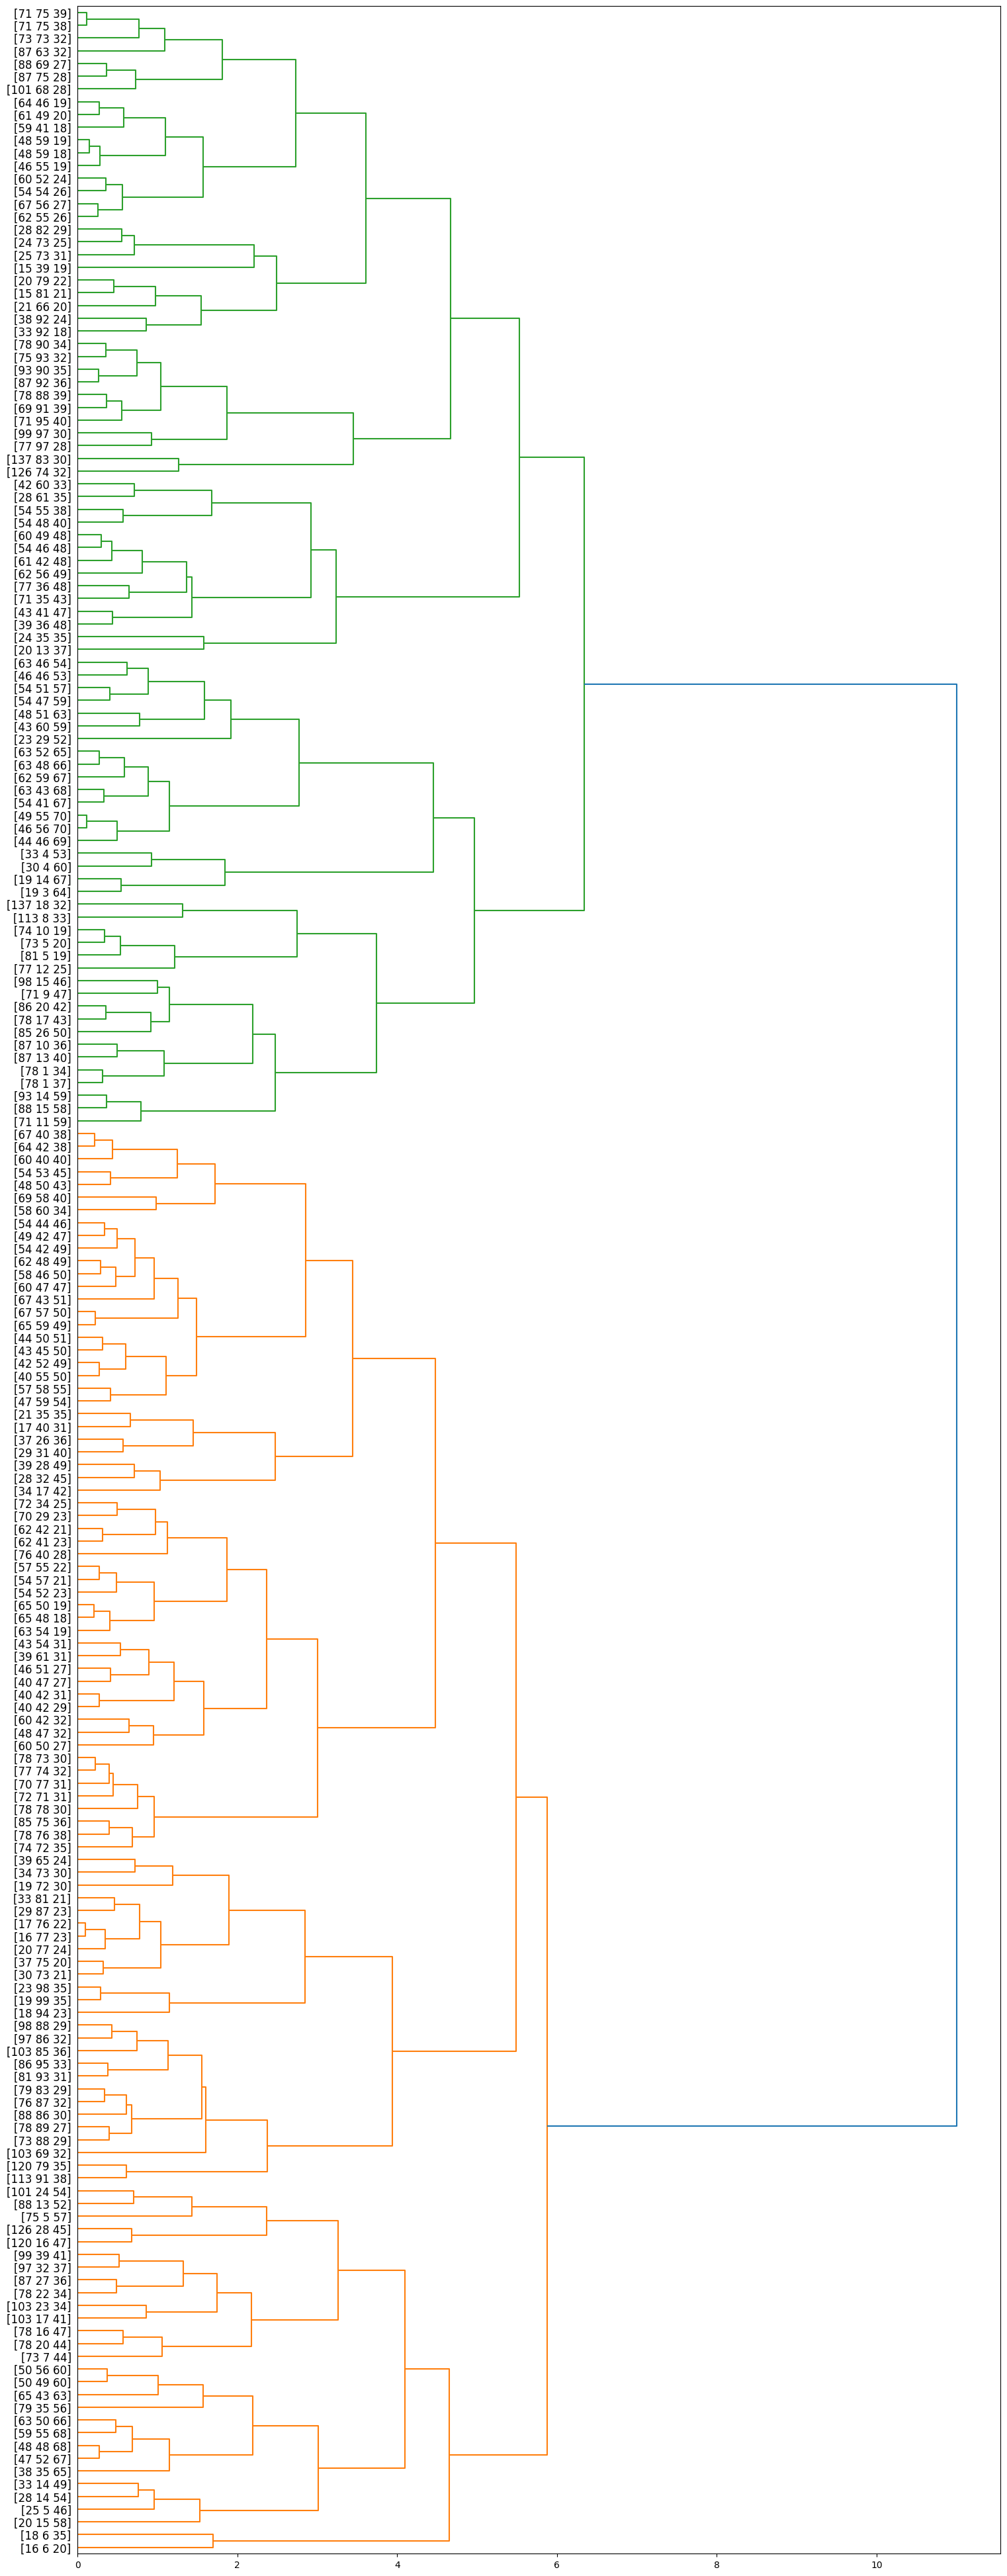

In [32]:
from scipy.cluster import hierarchy
import pylab

dendr_use_dist_matrix = hierarchy.linkage(distance_matrix, 'complete')

fig = pylab.figure(figsize=[18,50])

def llf(id):
    return '[%s %s %s]' % (df_customer['Annual Income (k$)'][id], df_customer['Spending Score (1-100)'][id], int(float(df_customer['Age'][id])))

dendro = hierarchy.dendrogram(dendr_use_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')


### show clusters

In [33]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=4, linkage='complete')
agglom.fit(distance_matrix)
agglom.labels_

/home/shadman/Documents/projects/machine_learning_prj/.ml_env/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:585: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 0, 3, 1, 1, 1, 3, 1, 2, 1, 2, 1, 3, 1, 0, 0, 1, 0, 2, 1, 0, 0,
       3, 0, 3, 0, 1, 0, 1, 1, 2, 1, 2, 0, 3, 1, 1, 1, 1, 1, 3, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 0, 3, 1, 2, 0,
       1, 3, 0, 1, 2, 1, 3, 3, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1,
       1, 1, 3, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 3, 2, 2, 2,
       2, 1, 1, 0, 1, 1, 3, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 1, 3, 0, 2, 1, 3, 0, 1, 1, 2, 0, 0, 1, 3, 0, 2, 0, 3, 1,
       3, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 3, 0, 2, 0, 2, 0, 3, 1,
       2, 0, 2, 0, 3, 1, 2, 1, 3, 0, 3, 0, 3, 1, 3, 1, 2, 1, 3, 1, 3, 0,
       2, 0])

In [36]:
# change name of columns

df_customer = df_customer.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'})
df_customer

,CustomerID,Gender,Age,Income,Score,clust_km
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,1
3,4,0,23,16,77,3
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,2
197,198,1,32,126,74,0
198,199,1,32,137,18,2


/tmp/ipykernel_5301/627646711.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Score, subset.Income, s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)
/tmp/ipykernel_5301/627646711.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Score, subset.Income, s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)
/tmp/ipykernel_5301/627646711.py:15: UserWarning: 

Text(0, 0.5, 'Income')

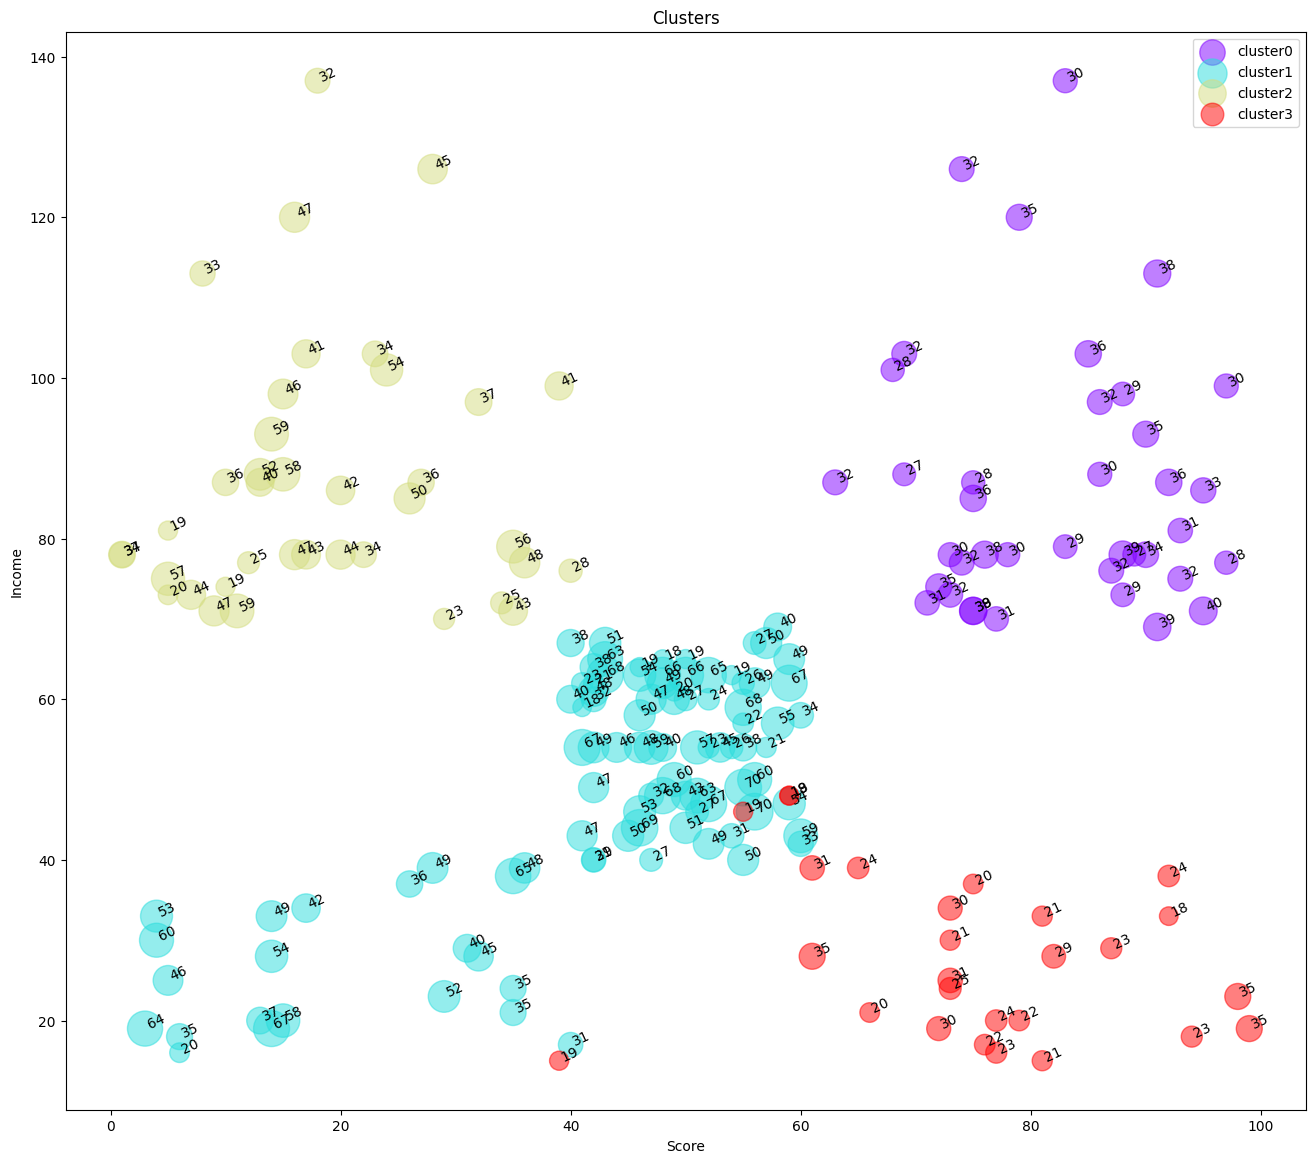

In [40]:
# plot clusters

import matplotlib.cm as cm

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df_customer[df_customer.clust_km == label]
    for i in subset.index:
            plt.text(subset.Score[i], subset.Income[i],str(subset['Age'][i]), rotation=25) 
    plt.scatter(subset.Score, subset.Income, s= subset.Age*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Score')
plt.ylabel('Income')
